In [5]:
import torch
import matplotlib.pyplot as plt
from torch.distributions.poisson import Poisson

(array([1., 4., 1., 3., 4., 5., 9., 0., 7., 5., 4., 3., 1., 2., 1.]),
 array([ 4.        ,  4.86666679,  5.73333359,  6.5999999 ,  7.4666667 ,
         8.33333397,  9.19999981, 10.0666666 , 10.9333334 , 11.80000019,
        12.66666698, 13.53333378, 14.39999962, 15.26666641, 16.13333321,
        17.        ]),
 <BarContainer object of 15 artists>)

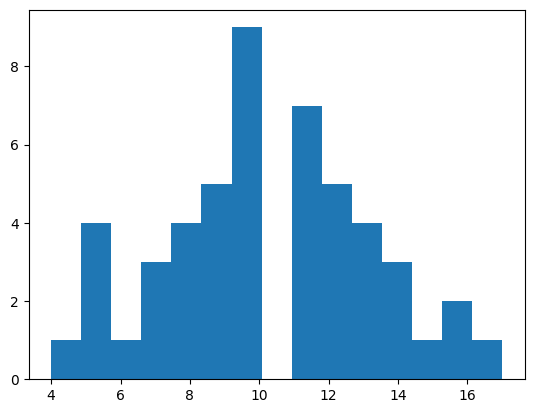

In [19]:
m = Poisson(torch.tensor([10.0]))
samples=m.sample((50,))
plt.hist(samples.numpy(),bins=15)

In [39]:
multi_dist=Poisson(torch.tensor(range(0,5)).reshape(5,-1))
torch.exp(multi_dist.log_prob(torch.tensor(range(0,5)).repeat(5).view(5,-1)))

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3679, 0.3679, 0.1839, 0.0613, 0.0153],
        [0.1353, 0.2707, 0.2707, 0.1804, 0.0902],
        [0.0498, 0.1494, 0.2240, 0.2240, 0.1680],
        [0.0183, 0.0733, 0.1465, 0.1954, 0.1954]])